<a href="https://colab.research.google.com/github/FREEZ2385/ai-project-experiment/blob/main/diabetes_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 경사 하강법의고 선형회귀의 가중치와 절편 구하기

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

Text(0, 0.5, 'y')

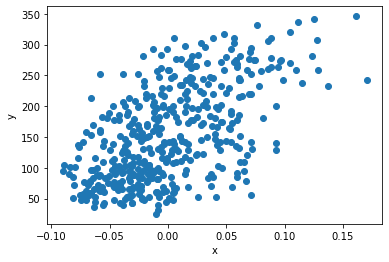

In [2]:
diabetes = load_diabetes()
plt.scatter(diabetes.data[:, 2], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')

In [3]:
x = diabetes.data[:, 2]
y = diabetes.target

-----

## 예시 테스트
예측값을 구하기 위해 훈련 데이터를 예시로 1,2번째 데이터만을 이용해 진행해보도록 하겠다.
훈련 데이터에 잘 맞는 w와 b를 찾는 방법
 - 무작위로 w와 b를 정하기
 - x에서 샘플 하나를 가져와 y_hat를 계산
 - y_hat와 선택한 샘플의 진짜 y를 비교(오류값 err)
 - y_hat에 가까워지도록 w, b를 조정
 - 다음 샘플을 가져와 처리

In [4]:
w = 1.0
b = 1.0

In [5]:
y_hat = x[0] * w + b
print(y_hat)

1.0616962065186886


In [6]:
w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b
print(y_hat_inc)

1.0678658271705574


In [7]:
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print(w_rate)

0.061696206518688734


In [8]:
w_new = w + w_rate
print(w_new)

1.0616962065186888


In [9]:
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
print(y_hat_inc)

1.1616962065186887


In [10]:
err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + 1 * err
print(w_new, b_new)

10.250624555904514 150.9383037934813


In [11]:
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

14.132317616381767 75.52764127612664



-----
## 실전 학습 

1,2번 데이터만 가져와 실습했다면 이번엔 본격적으로 모든 데이터들의 예시를 가져와 예측값을 가져오도록 하겠다.

### 한 에포크만 실행

In [12]:
w = 1.0
b = 1.0
for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err
print(w, b)

587.8654539985689 99.40935564531424


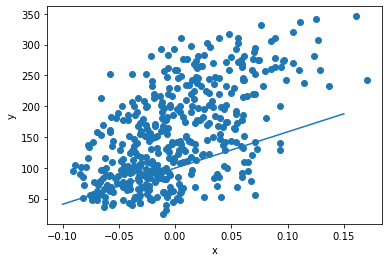

In [13]:
plt.scatter(diabetes.data[:, 2], diabetes.target)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 에포크 100단계 실행

In [14]:
w = 1.0
b = 1.0
for i in range(100):
    for x_i, y_i in zip(x, y):
        y_hat = x_i * w + b
        err = y_i - y_hat
        w_rate = x_i
        w = w + w_rate * err
        b = b + 1 * err
print(w, b)

913.5973364345905 123.39414383177204


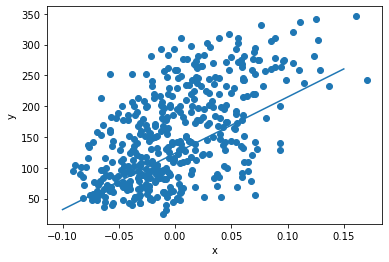

In [15]:
plt.scatter(diabetes.data[:, 2], diabetes.target)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [16]:
def add_new_data(x_new):
    y_pred = x_new * w + b
    return y_pred

In [17]:
test_1 = add_new_data(0.18)
print(test_1) #1에 가까울 수록 지금의 예측도에 일치

287.8416643899983
